# MODELO CLASIFICACION TREE 

Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.

In [3]:
import pandas as pd
import numpy as np

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

# librerias Procesamieno Feature_engineering
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier 
from collections import Counter

# Libreria Dimensionalidad
from sklearn.decomposition import PCA


Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. La variable edad tambien es transformada a Int(64)

In [4]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [5]:
df.head(2)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0


In [6]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## LABEL ENCODER

Dentro del Data Frame existen 10 variables categoricas las cuales tenemos que transformar a numero para poder utilizarlas en el modelo.

In [7]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

Transformamos las variables

In [8]:
lbl.fit_transform(df['tipo_gestor'])
lbl.fit_transform(df['esta_carterizado'])
lbl.fit_transform(df['cliente_bbp'])
lbl.fit_transform(df['cartera_patron'])
lbl.fit_transform(df['digital_3_meses'])
lbl.fit_transform(df['camino_digital'])
lbl.fit_transform(df['marca_bp'])
lbl.fit_transform(df['marca_ccte'])
lbl.fit_transform(df['seg_valor'])
lbl.fit_transform(df['seg_recorrido'])


array([1, 0, 1, ..., 3, 3, 0])

Asignamos a cada una de estas variables una nueva columna

In [9]:
df['tipo_gestor_etiqueta']=lbl.fit_transform(df['tipo_gestor'])
df['esta_carterizado_etiqueta']=lbl.fit_transform(df['esta_carterizado'])
df['cliente_bbp_etiqueta']=lbl.fit_transform(df['cliente_bbp'])
df['cartera_patron_etiqueta']=lbl.fit_transform(df['cartera_patron'])
df['digital_3_meses_etiqueta']=lbl.fit_transform(df['digital_3_meses'])
df['camino_digital_etiqueta']=lbl.fit_transform(df['camino_digital'])
df['marca_bp_etiqueta']=lbl.fit_transform(df['marca_bp'])
df['marca_ccte_etiqueta']=lbl.fit_transform(df['marca_ccte'])
df['seg_valor_etiqueta']=lbl.fit_transform(df['seg_valor'])
df['seg_recorrido_etiqueta']=lbl.fit_transform(df['seg_recorrido'])

Confirmamos que la transformacion se ha realizado correctamente. 

In [10]:
df['seg_recorrido_etiqueta'].value_counts()

0    163991
2    149923
1    127889
3      9571
Name: seg_recorrido_etiqueta, dtype: int64

Eliminamos las antiguas variables categoricas que se han transformado y lo confirmamos listando las columnas.

In [11]:

df.drop(['tipo_gestor','esta_carterizado','cliente_bbp','cartera_patron','digital_3_meses','camino_digital',
         'marca_bp','marca_ccte','seg_valor','seg_recorrido'],axis = 1,inplace = True)

In [12]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

# OUTLIERS

Hemos visto durante la exploracion del data set que existen distintas variables que son susceptibles de tener Outliers. Estas son 'edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'.  Trabajamos con ellas.  Lo primero que hacemos es analizarlas estadisticamente con Describe() y plotear un histograma de las mismas para verlas graficamente

In [13]:
posibles_variables_con_outliers = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp']]

In [14]:
posibles_variables_con_outliers.describe()

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp
count,451374.000000,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000
mean,58.268941,4.971455e+04,1.380668e+04,8.483663e+03,1728.478326
std,19.018368,8.792364e+04,4.296438e+04,3.844671e+04,10780.622435
min,0.000000,-5.104332e+04,-4.900000e+03,0.000000e+00,0.000000
25%,45.000000,1.813182e+03,0.000000e+00,0.000000e+00,0.000000
50%,60.000000,1.520828e+04,0.000000e+00,0.000000e+00,0.000000
75%,73.000000,6.446964e+04,6.841775e+02,0.000000e+00,0.000000
max,118.000000,5.290216e+06,2.896317e+06,3.130940e+06,459937.460000


- Variable Fondos de Inversion. No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en Fondos de Inversion.
- Variable Planes de Pension.  No contiene outliers. Son valores reales. La mayoria de los clientes no tienen saldos en Planes de Pension.
- Variable Captacion. No tiene outliers. Son valores reales. Solamente modificamos los negativos y les damos valor de la media.
- Variable saldo Financiacion. No tiene outliers. Son valores reales.Solamente modificamos los negativos y les damos valor de la media.
- __Variable edad. Es la unica que puede tener ouliers reales.  Estudiamos y esos ouliers les asignaremos un nuevo valor.__

__Variable EDAD__

Hacemos una primera visualizacion con un histograma y un BoxPlot.  Estos arrojan informacion interesante como la distribucion normal y que el maximo de edad es de 118 años y que existen clientes con 0 años. Con este Boxplot vemos que los valores por debajo de 3/4 años y los valores por encima de los 114/115 años son outliers.  Estos valores los vamos a corregir dandoles valores minimos de 18 años y maximo de 100, adaptandolos a la realidad de mayoria de edad y de logica de estimacion de vida.

<AxesSubplot:>

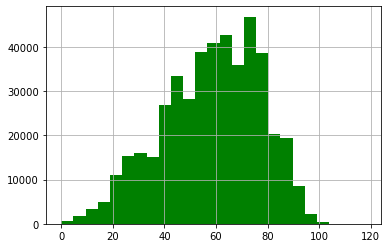

In [15]:
df['edad'].hist(color = 'g', bins = 25)

Boxplot edad


count    451374.000000
mean         58.268941
std          19.018368
min           0.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         118.000000
Name: edad, dtype: float64

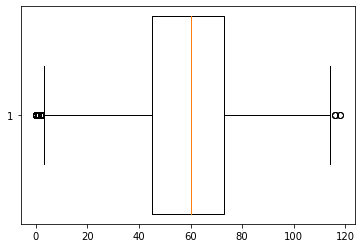

In [16]:
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   
df['edad'].describe()

In [17]:
print ('Cuartiles edad')
print('='*30)
Q1 = df['edad'].quantile(0.25)
print ('Primer cuartil',Q1)
print('='*30)
Q3 = df['edad'].quantile(0.75)
print ('Tercer cuartil',Q3)
print('='*30)
rangointercuartil = (Q3 - Q1)
print ('Rango_intercuartil',rangointercuartil)
print('='*30)
mediana = df['edad'].median()
print ('Mediana', mediana)
print('='*30)
minimo = df['edad'].min()
print ('Minimo', minimo)
print('='*30)
maximo = df['edad'].max()
print ('Maximo', maximo)

Cuartiles edad
Primer cuartil 45.0
Tercer cuartil 73.0
Rango_intercuartil 28.0
Mediana 60.0
Minimo 0.0
Maximo 118.0


In [18]:
#sacamos los extremos superiores e inferiores de los bigotes
print('='*30)
extremo_inferior = Q1 - 1.5 * rangointercuartil
print ('Extremo bigote_inferior', extremo_inferior)
print('='*30)
extremo_superior = Q3 + 1.5 * rangointercuartil
print ('Extremo bigote_superior', extremo_superior)
print('='*30)

Extremo bigote_inferior 3.0
Extremo bigote_superior 115.0


In [19]:
# Detectamos y contamos los outliers
ubicacion_outliers = (df['edad'] < extremo_inferior) | (df['edad'] > extremo_superior)
outliers = df['edad'][ubicacion_outliers]
resto_datos_no_outliers = (df['edad'] >= extremo_inferior) & (df['edad'] <= extremo_superior)
no_outliers = df['edad'][resto_datos_no_outliers]
print('Outliers    :', outliers.count())
print('No Outliers :', no_outliers.count())


Outliers    : 254
No Outliers : 451120


In [20]:
# No queremos eliminar los outliers ya que son muy pocos vs todo el df. Los transformamos a la media de edad
df['edad'] = df['edad'].where(df['edad'] > 3 ,df['edad'].mean())
df['edad'] = df['edad'].where(df['edad'] < 115 ,df['edad'].mean())

Boxplot edad


count    451374.000000
mean         58.324076
std          18.934848
min           4.000000
25%          45.000000
50%          60.000000
75%          73.000000
max         114.000000
Name: edad, dtype: float64

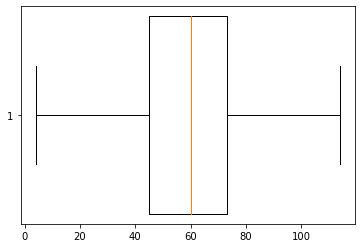

In [21]:
# Volvemos a hacer la  visualizacion
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   
df['edad'].describe()

__Variable SALDO CAPTACION__

Sacamos un histograma y listamos un describe() para ver cual es su distribucion y sus principales estadisticas descirptivas. Esta variable esta conpuesta principalmente por clientes con bajos saldos de ahorro. En este caso todos los saldos son utiles, no existen outliers pero si saldos negativos que vamos a corregir para el modelo dandoles valores de 0 euros.

<AxesSubplot:>

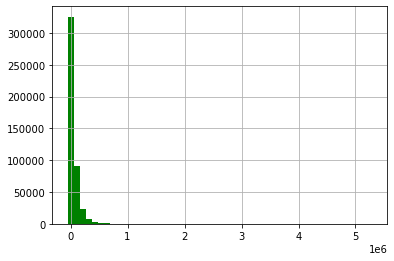

In [22]:
df['saldo_captacion'].hist(color = 'g', bins = 50)

In [23]:
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971455e+04
std      8.792364e+04
min     -5.104332e+04
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [24]:
# Hay 9440 clientes con saldo negativo . Solo el 2%
Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique()
Porcentaje_Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('Clientes_con_saldos_negativos :',Clientes_con_saldos_negativos)
print ('Porcentaje_Clientes_con_saldos_negativos: ',Porcentaje_Clientes_con_saldos_negativos)

Clientes_con_saldos_negativos : 9440
Porcentaje_Clientes_con_saldos_negativos:  0.02091392060685817


In [25]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [26]:
# Sacamos nuvamente datos estadisticos..
df['saldo_captacion'].describe()

count    4.513740e+05
mean     4.971805e+04
std      8.792162e+04
min      0.000000e+00
25%      1.813182e+03
50%      1.520828e+04
75%      6.446964e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

__Variable SALDO FINANCIACION__

Sacamos un histograma y listamos un describe() para ver cual es su distribucion y sus principales estadisticas descirptivas. Todos los datos de esta variable son datos validos ya que se trata de financiacion real de los clientes.  No existen outliers pero si existen clientes con financiacion negativa, esto es que son deudores.  Estos datos los vamos a transformar a valor 0€

<AxesSubplot:>

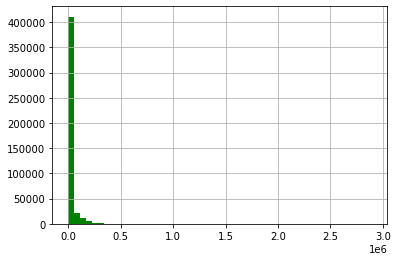

In [27]:
df['saldo_financiacion'].hist(color = 'g', bins = 50)

In [28]:
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.353979e+04
std      4.262430e+04
min     -4.900000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      6.066900e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

In [29]:
# Hay 9439 clientes con saldo negativo . 
Clientes_con_financiacion_negativa = df[df['saldo_financiacion'] < 0]['cliente'].nunique()
Porcentaje_Clientes_con_financiacion_negativad = df[df['saldo_financiacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('Clientes_con_financiacion_negativa :',Clientes_con_financiacion_negativa)
print ('Porcentaje_Clientes_con_financiacion_negativa: ',Porcentaje_Clientes_con_financiacion_negativad)

Clientes_con_financiacion_negativa : 696
Porcentaje_Clientes_con_financiacion_negativa:  0.0015419585532175093


In [30]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_financiacion'] < 0] = 0

In [31]:
df['saldo_financiacion'].describe()

count    4.513740e+05
mean     1.354013e+04
std      4.262418e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.066900e+02
max      2.896317e+06
Name: saldo_financiacion, dtype: float64

__Variable SALDO PLANES DE PENSION__

Sacamos un histograma y listamos un describe() para ver cual es su distribucion y sus principales estadisticas descriptivas. Se trata de una variable donde la mayoria de los clientes no tienen saldos en Planes de Pension.  Esta variable la mantenemos sin hacer ningun cambio. 

<AxesSubplot:>

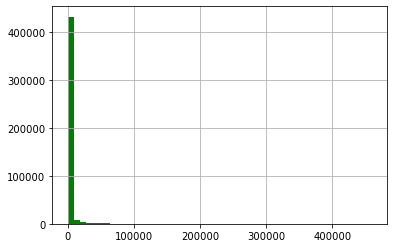

In [32]:
df['saldo_plp'].hist(color = 'g', bins = 50)

In [33]:
df['saldo_plp'].describe()

count    451374.000000
mean       1720.115913
std       10755.266998
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      459937.460000
Name: saldo_plp, dtype: float64

## __ADAPTAMOS EL DF SEGUN LAS VARIABLES QUE VAMOS A NECESITAR__



In [34]:
df.columns

Index(['cliente', 'saldo_captacion', 'gestor', 'codigo_cartera',
       'saldo_financiacion', 'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos', 'lp_of_int', 'edad', 'dz',
       'oficina', 'lp_seg_vida', 'lp_seg_acc', 'lp_seg_salud', 'lp_seg_hogar',
       'lp_seg_auto', 'tipo_gestor_etiqueta', 'esta_carterizado_etiqueta',
       'cliente_bbp_etiqueta', 'cartera_patron_etiqueta',
       'digital_3_meses_etiqueta', 'camino_digital_etiqueta',
       'marca_bp_etiqueta', 'marca_ccte_etiqueta', 'seg_valor_etiqueta',
       'seg_recorrido_etiqueta'],
      dtype='object')

In [35]:
df = df[['edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp',
              'lp_dom_ingresos','lp_tjta_cto','lp_tjt_rev','lp_rbos','lp_of_int',
              'lp_seg_vida','lp_seg_acc','lp_seg_salud','lp_seg_auto','lp_seg_hogar',
              'cartera_patron_etiqueta','digital_3_meses_etiqueta','camino_digital_etiqueta','marca_bp_etiqueta','marca_ccte_etiqueta',
              'seg_valor_etiqueta','seg_recorrido_etiqueta']]
               

In [36]:
df.describe()

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,...,lp_seg_salud,lp_seg_auto,lp_seg_hogar,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
count,451374.000000,4.513740e+05,4.513740e+05,4.513740e+05,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,...,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000,451374.000000
mean,57.296366,4.957242e+04,1.354013e+04,8.443670e+03,1720.115913,0.693447,0.543656,0.234265,0.856356,0.753249,...,0.004143,0.013645,0.129228,0.494051,0.496830,2.479751,0.278603,0.633902,0.718752,0.986862
std,20.613212,8.743404e+04,4.262418e+04,3.806693e+04,10755.266998,0.461063,0.498091,0.423539,0.350728,0.431121,...,0.064232,0.116012,0.335452,0.806837,0.499991,1.226279,0.448312,0.866855,0.883551,0.886218
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1.788805e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,1.509917e+04,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,73.000000,6.427437e+04,6.066900e+02,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000
max,114.000000,5.096383e+06,2.896317e+06,2.848191e+06,459937.460000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000


## NORMALIZACION

Debemos llevar todas las varaibles a una escala comun. Para ello utilizamos MinMaxScaler.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
df_normalizado = scaler.fit_transform(df)

In [40]:
columnas_datos_numericos = df.columns

In [41]:
df_normalizado = pd.DataFrame(df_normalizado, columns=columnas_datos_numericos)

In [42]:
df_normalizado.head(3)

,edad,saldo_captacion,saldo_financiacion,saldo_ffii,saldo_plp,lp_dom_ingresos,lp_tjta_cto,lp_tjt_rev,lp_rbos,lp_of_int,...,lp_seg_salud,lp_seg_auto,lp_seg_hogar,cartera_patron_etiqueta,digital_3_meses_etiqueta,camino_digital_etiqueta,marca_bp_etiqueta,marca_ccte_etiqueta,seg_valor_etiqueta,seg_recorrido_etiqueta
0,0.605263,0.260598,0.0,0.45682,0.031101,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.333333
1,0.710526,0.224126,0.0,0.39064,0.000000,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.000000
2,0.657895,0.224126,0.0,0.39064,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.75,0.0,1.0,0.0,0.333333


## PCA No aplicamos

Despues de haber reducido el Data Frame quedandonos unicamente con las columnas necesarias para el estudio del modelo, aun asi tenemos 22 variables que vamos a intentar reducir utilizando PCA para reducir la dimensionalidad. Compararemos si la utilizacion del PCA mejora o no el resultado.



In [134]:
#from sklearn.decomposition import PCA

In [135]:
#df_sin_target = df_normalizado.drop(['lp_seg_hogar'], axis = 1)

In [136]:
#Instanciamos objeto PCA y aplicamos
#pca = PCA(15) # n = 10 ponemos como numero de pcas 10 
#pca.fit(df_sin_target) # obtener los componentes principales
#df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [137]:
#pca.components_[5]

array([ 0.03865778,  0.0064198 , -0.0121036 ,  0.00251125,  0.0018527 ,
       -0.24420733,  0.28393665, -0.16512918, -0.20518622,  0.04852254,
       -0.48135731, -0.05712452, -0.00922022, -0.01870848, -0.02790242,
        0.0166263 , -0.25461317,  0.38562885, -0.1189153 ,  0.44952238,
       -0.34658427])

In [138]:
#list(zip(df_sin_target.columns, df_transforming[0]))

[('edad', -1.0511399979794391),
 ('saldo_captacion', 0.22634828635251705),
 ('saldo_financiacion', 0.135299496565483),
 ('saldo_ffii', 0.26729552368437204),
 ('saldo_plp', 0.5500890111913036),
 ('lp_dom_ingresos', -0.10174484196765449),
 ('lp_tjta_cto', 0.044166767521695925),
 ('lp_tjt_rev', 0.03753192984058975),
 ('lp_rbos', -0.32672018832192307),
 ('lp_of_int', 0.39885865448825303),
 ('lp_seg_vida', -0.22553960392629488),
 ('lp_seg_acc', 0.00966112495798329),
 ('lp_seg_salud', -0.3083050621993351),
 ('lp_seg_auto', -0.1276464835765896),
 ('cartera_patron_etiqueta', 0.055018165594987185),
 ('digital_3_meses_etiqueta', -0.03534114206167871),
 ('camino_digital_etiqueta', -0.006268150333162006),
 ('marca_bp_etiqueta', 0.16446369080485101),
 ('marca_ccte_etiqueta', 0.4488890251587077),
 ('seg_valor_etiqueta', 0.12239446374596813)]

In [139]:
#print("shape of X_pca", df_transforming.shape)
#expl = pca.explained_variance_ratio_
#print(expl)
#print('suma:',sum(expl[0:15]))
#Vemos que con 15 componentes tenemos algo mas del 85% de varianza explicada

shape of X_pca (451374, 20)
[2.67493261e-01 1.48262342e-01 1.10615526e-01 9.61410144e-02
 6.50334477e-02 5.14820528e-02 4.34486913e-02 4.08587758e-02
 3.83051216e-02 3.31243719e-02 3.08642658e-02 2.65699885e-02
 2.34951797e-02 8.15522189e-03 8.04602315e-03 5.83750271e-03
 1.80357786e-03 2.39015332e-04 1.11752531e-04 7.99909691e-05]
suma: 0.991895283174887


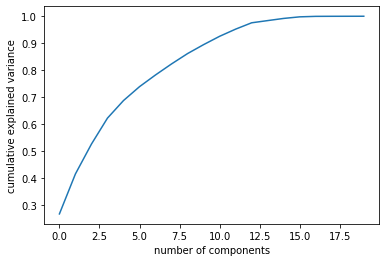

In [140]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')
#plt.show() 

In [141]:
#df_pca = pd.DataFrame (data = df_transforming, columns = ['1','2','3','4','5','6','7','8','9',
#                                                          '10','11','12','13','14','15','16',
#                                                          '17','18','19','20'])

In [142]:
#finalDf = pd.concat ([df_pca, df_normalizado [['lp_seg_hogar']]], axis = 1)

In [143]:
#finalDf.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', 'lp_seg_hogar'],
      dtype='object')

In [144]:
#finalDf = finalDf.drop(['15','16','17','18','19','20'], axis = 1)

## MODELO

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [45]:
X = df_normalizado.drop(['lp_seg_hogar'], axis = 1)
y= df_normalizado['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 9478854 (451374, 21)
Datos y = 451374 (451374,)


In [46]:
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [47]:
# criterion = 'entropy', class_weight ='balanced',max_depth=6,min_samples_leaf=100,
clftree = DecisionTreeClassifier(class_weight ='balanced')

In [48]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [49]:
clftree.predict(X_test)

array([0., 0., 1., ..., 0., 0., 1.])

In [50]:
clftree.predict_proba(X_test)[:, 1]

array([0., 0., 1., ..., 0., 0., 1.])

In [58]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO  
dot_data = StringIO()
export_graphviz(clftree, out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),height = 15000,width = 700)

KeyboardInterrupt: 

[[72191  6406]
 [ 6665  5013]]


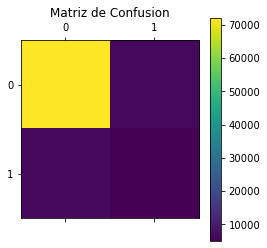

In [51]:
matriz_confusion_clftree = confusion_matrix(y_test,clftree.predict(X_test))
print(matriz_confusion_clftree)
pl.matshow(confusion_matrix(y_test,clftree.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

## Metrics: Cross validation

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clftree,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clftree,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clftree,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.4384034678024852, 0.43053317332419, 0.4348181011201039)

In [53]:
print('========= CLFTREE ==================')
print ('accuracy_score = ', accuracy_score(y_test,clftree.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clftree.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clftree.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clftree.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clftree.predict(X_test)))

========= CLFTREE ==================
accuracy_score =  0.855209083356411
precision = 0.4390051668272178
recall = 0.4292687103956157
f1_score = 0.43408234835692944
roc_auc_score = 0.6739005210977778


## Pintamos Curva Roc

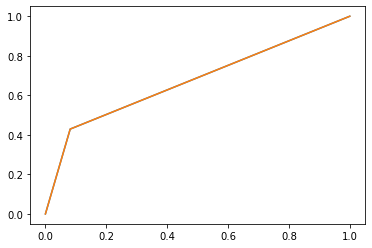

In [54]:
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,clftree.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)
fp,tp,_ = roc_curve(y_test,clftree.predict_proba(X_test)[:,target_pos])
plt.plot(fp,tp)

## GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# DecisionTreeClassifier() solo para ver paramentros

In [57]:
# criterion = 'entropy', class_weight ='balanced',max_depth=6,min_samples_leaf=100,
tree_grid_params = {       
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [100,115,130]
    }

treegs = GridSearchCV(
        clftree,
        tree_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [58]:
treegs.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.4min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [100, 115, 130],
                         'min_samples_split': [2, 4, 6]},
             verbose=1)

In [59]:
treegs.best_score_

0.7593873262747523

In [60]:
treegs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=100)

In [61]:
treegs.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 2}

## Hacemos el modelo con los mejores parametros

In [82]:
clftree = DecisionTreeClassifier(criterion = 'gini', class_weight ='balanced',
                                 max_depth=10,min_samples_leaf=10,
                                 min_samples_split = 4)

In [83]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, min_samples_split=4)

In [134]:
predictionstree = clftree.predict(X_test)

In [135]:
probabilitiestree = clftree.predict_proba(X_test)

In [136]:
clftree.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [137]:
clftree.predict_proba(X_test)[:, 1]

array([0.71570196, 0.61035443, 0.6992045 , ..., 0.61035443, 0.7153048 ,
       0.67987266])

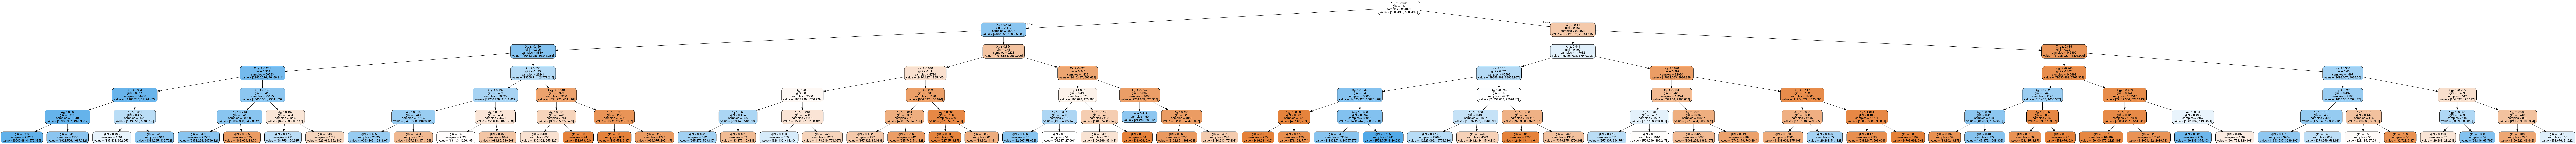

In [138]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO  
dot_data = StringIO()
export_graphviz(clftree, out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),height = 15000,width = 700)

[[51826 26771]
 [ 1296 10382]]


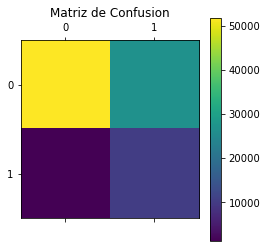

In [139]:
matriz_confusion_clftree = confusion_matrix(y_test,clftree.predict(X_test))
print(matriz_confusion_clftree)
pl.matshow(confusion_matrix(y_test,clftree.predict(X_test)))
pl.title('Matriz de Confusion')
pl.colorbar()
pl.show()

In [140]:
print('========= CLFTREE ===================')
print ('accuracy_score = ', accuracy_score(y_test,clftree.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clftree.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clftree.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clftree.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clftree.predict(X_test)))

========= CLFTREE ===================
accuracy_score =  0.6890944336748823
precision = 0.27943907625225417
recall = 0.8890220928241137
f1_score = 0.42522168294730806
roc_auc_score = 0.8261244986284697
